

1.   We want to predict future values
2.   Exponential smoothing calculates the moving average by considering more past values and give them weightage as per their occurrence, as recent observation gets more weightage compared to past observation so that the prediction is accurate. 
3. 



In [1]:
!pip install openpyxl==3.0.0

In [2]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pylab import rcParams

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Load the data

<bound method DataFrame.info of                 PeriodStart  Ghi Prev Day  Ghi Curr Day
0      2020-01-02T00:00:00Z             0             0
1      2020-01-02T00:30:00Z             0             0
2      2020-01-02T01:00:00Z             0             0
3      2020-01-02T01:30:00Z             0             0
4      2020-01-02T02:00:00Z             0             0
...                     ...           ...           ...
17515  2020-12-31T21:30:00Z             0             0
17516  2020-12-31T22:00:00Z             0             0
17517  2020-12-31T22:30:00Z             0             0
17518  2020-12-31T23:00:00Z             0             0
17519  2020-12-31T23:30:00Z             0             0

[17520 rows x 3 columns]>


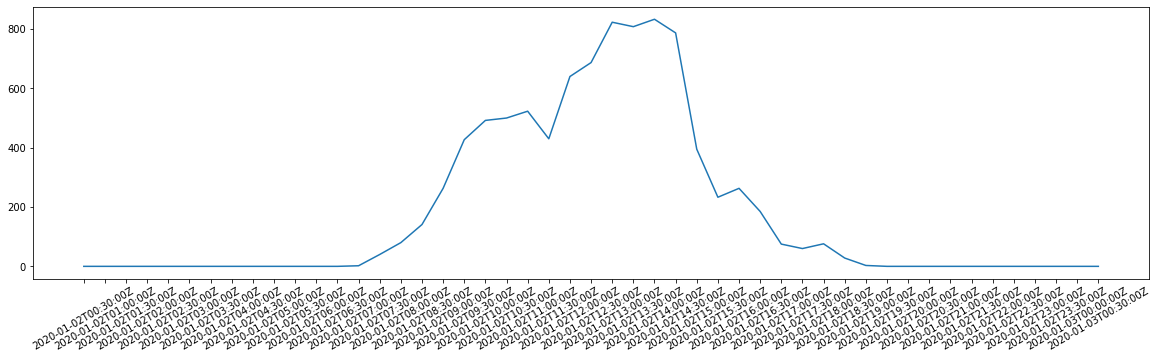

In [13]:
fields = ['PeriodStart', 'Ghi Prev Day', 'Ghi Curr Day'] # we only want to use these rows
rcParams["figure.figsize"] = 20,5
filename = "/content/drive/MyDrive/imdc/Irradiance_39.xlsx"
df = pd.read_excel(filename, usecols=fields)
print(df.info)
xpoints = df['PeriodStart'][1:50].values
ypoints = df['Ghi Curr Day'][1:50].values

plt.plot(xpoints, ypoints)
plt.xticks(rotation=30)
plt.show()

#Visualizing Moving Average method

1. A moving average is a statistic that captures the average change in a data series over time.

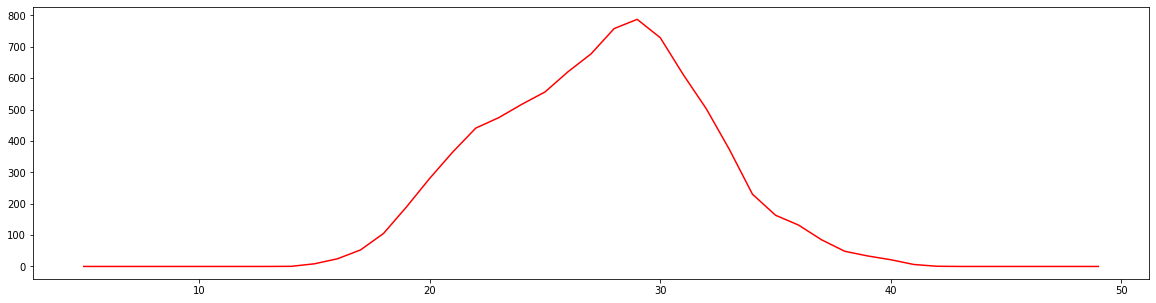

In [14]:
rollingseries = df['Ghi Curr Day'][1:50].rolling(window=5)
rollingmean = rollingseries.mean() #we can compute any statistical measure
#print(rollingmean.head(10))
rollingmean.plot(color="red")
plt.show()

# Exponential Smoothing
Exponential smoothing calculates the moving average by considering more past values and give them weightage as per their occurrence, as recent observation gets more weightage compared to past observation so that the prediction is accurate.


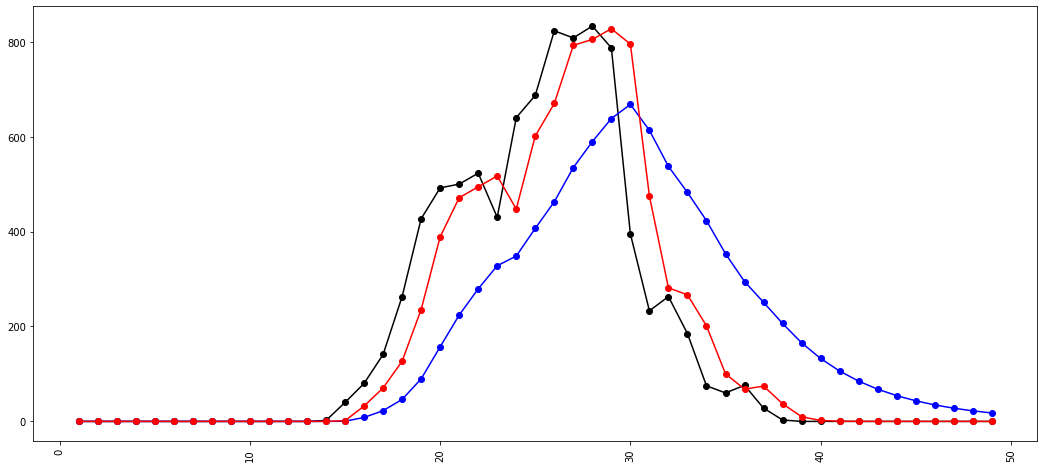

In [15]:
data = df['Ghi Curr Day'][1:50]
fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2, optimized=False)
fit2 = SimpleExpSmoothing(data).fit(smoothing_level=0.8, optimized=False)
plt.figure(figsize=(18, 8))
plt.plot(data, marker='o', color="black")
plt.plot(fit1.fittedvalues, marker="o", color="b") # lower alpha value graph
plt.plot(fit2.fittedvalues, marker="o", color="r") # higher alpha value graph
plt.xticks(rotation="vertical")
plt.show()

# Holt or Linear exponential  [Not applicable lol]
It forecast the data with the trend. It works on three separate equations that work together to generate the final forecast. let us apply this to our data and experience the changes. In the first fit, we are assuming that there is a linear trend in data, and in the second fitting, we are having exponential smoothing.

This method is not practical for us as we have 0 Ghi at night.

In [ ]:
fit1 = Holt(data).fit()  #linear trend
fit2 = Holt(data, exponential=True).fit()  #exponential trend
plt.plot(data, marker='o', color='black')
plt.plot(fit1.fittedvalues, marker='o', color='b')
plt.plot(fit2.fittedvalues, marker='o', color='r')
plt.xticks(rotation="vertical")
plt.show()

## NEW 

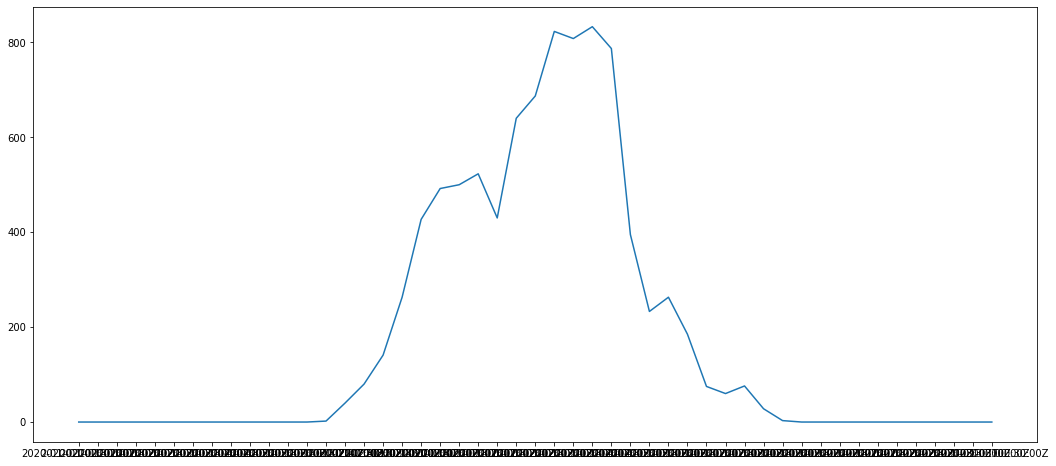

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pandas as pd

fields = ['PeriodStart', 'Ghi Prev Day', 'Ghi Curr Day'] # we only want to use these rows
rcParams["figure.figsize"] = 20,5
filename = "/content/drive/MyDrive/imdc/Irradiance_39.xlsx"
df = pd.read_excel(filename, usecols=fields)

df.reset_index(inplace=True)
import matplotlib.pyplot as plt
xpoints = df['PeriodStart'][1:50].values
ypoints = df['Ghi Curr Day'][1:50].values

plt.rcParams.update({'figure.figsize': (18,8)})
plt.plot(xpoints, ypoints)